In [1]:
import pandas as pd

# 데이터 가져오기
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv') 

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

In [3]:
train_df['대출 목적'].value_counts(normalize=True)

대출 목적
부채 통합        0.7294
기타           0.0970
주택 개보수       0.0909
사업 대출        0.0254
여행 자금        0.0173
의료비          0.0158
자동차 구매       0.0095
고액 구매        0.0068
소규모 사업 자금    0.0026
주택 구매        0.0026
결혼 자금        0.0014
휴가 비용        0.0006
이사 비용        0.0004
교육비          0.0003
Name: proportion, dtype: float64

In [11]:
train_df['대출 목적'].unique()

array(['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금',
       '교육비', '의료비', '고액 구매', '결혼 자금', '휴가 비용', '주택 구매', '이사 비용'],
      dtype=object)

In [ ]:
# 부채 통합
# 부동산: 주택 개보수, 주택 구매, 이사 비용
# 사업: 사업 대출, 소규모 사업 자금
# 생활: 의료비, 결혼 자금, 교육비
# 사치: 여행 자금, 자동차 구매, 고액 구매, 휴가 비용
# 기타

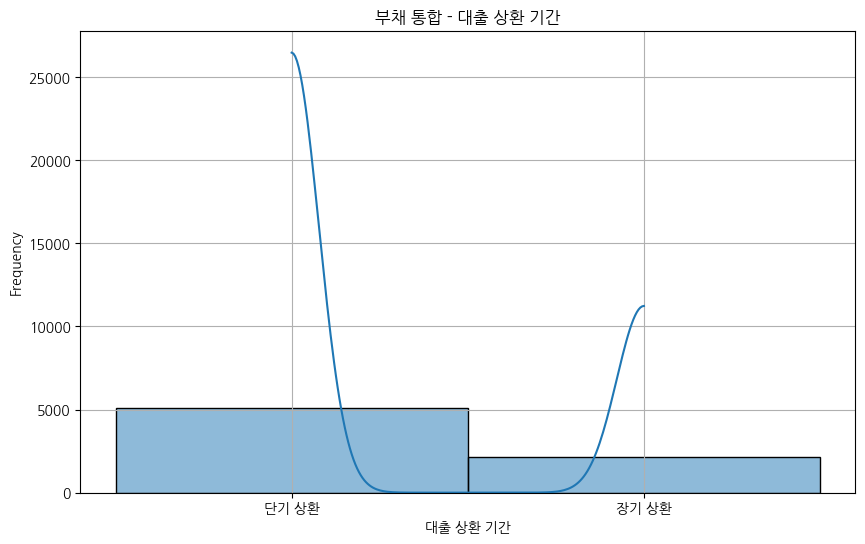

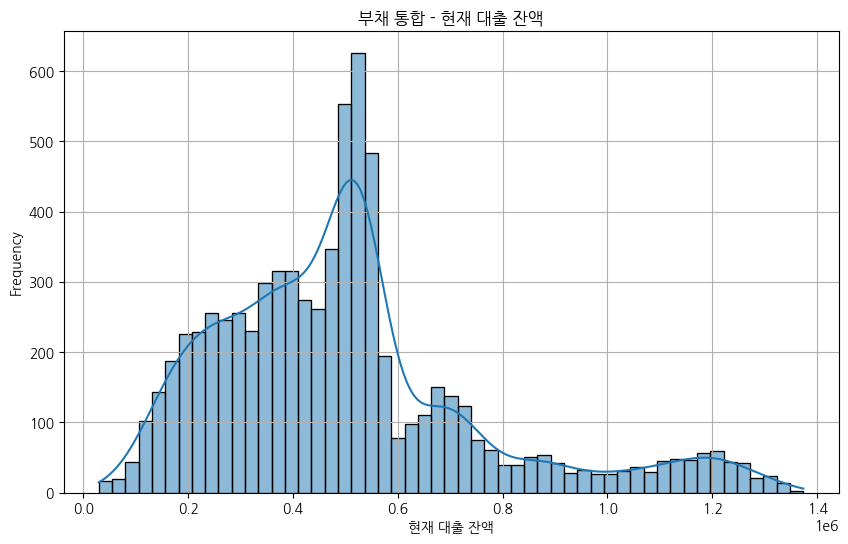

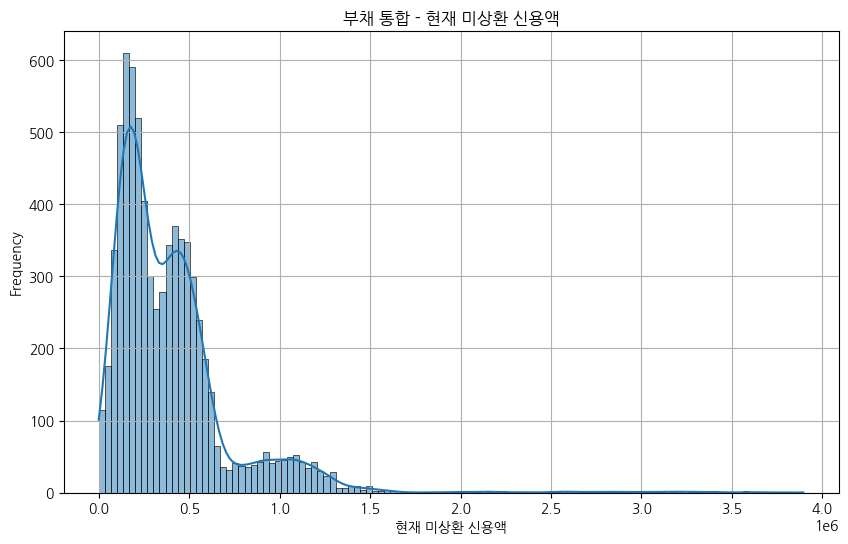

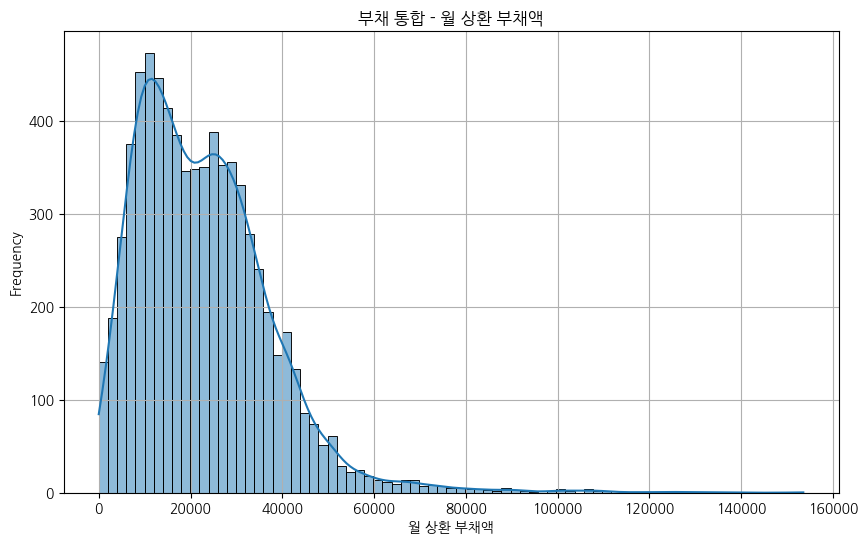

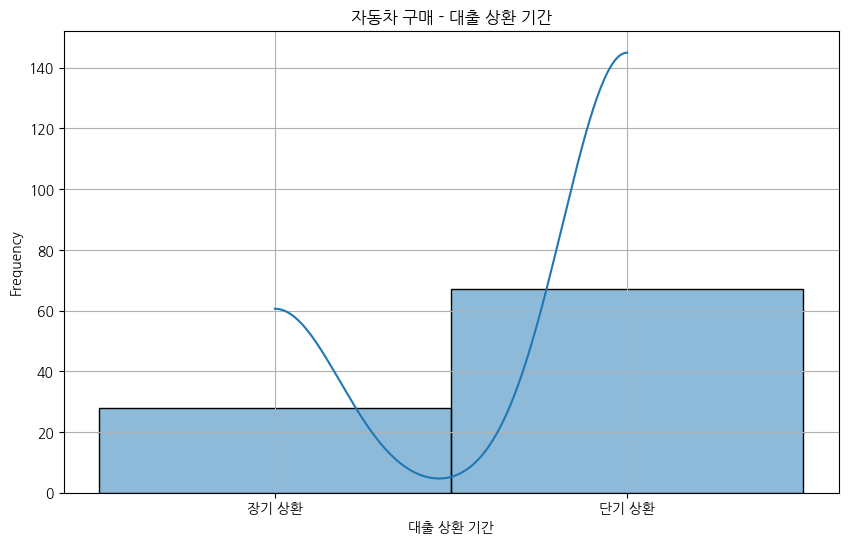

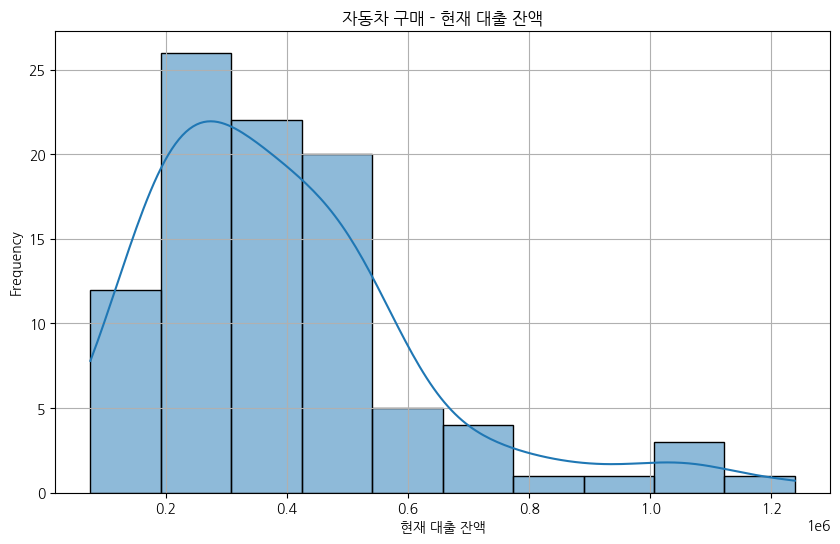

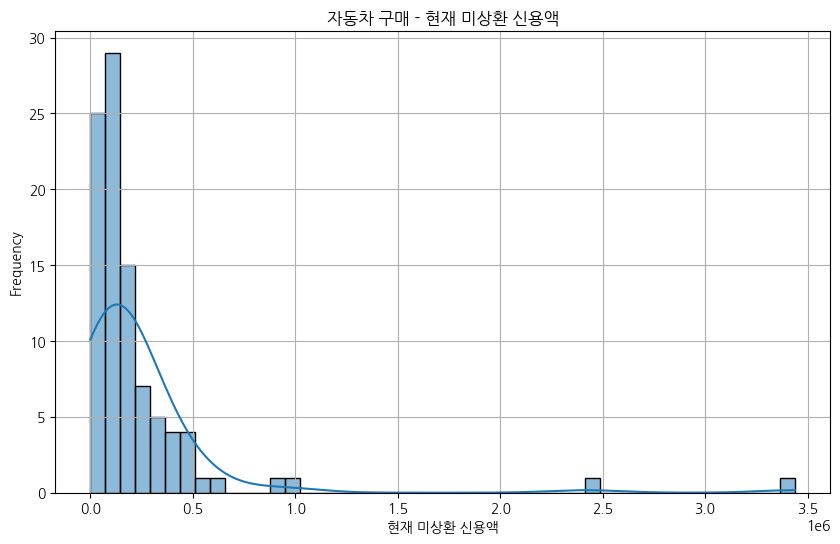

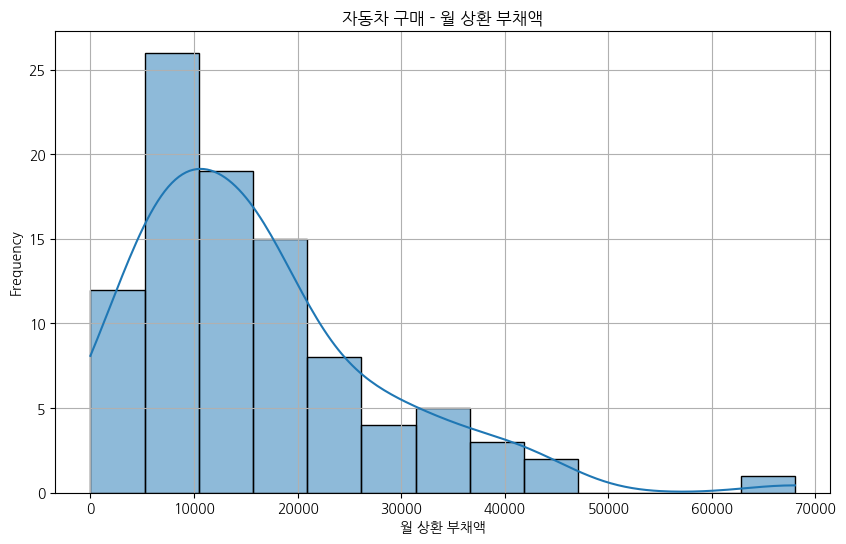

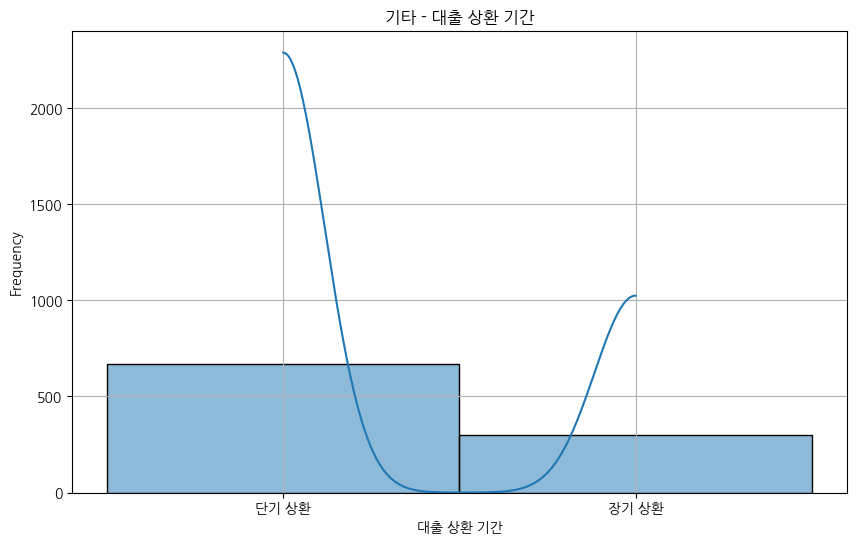

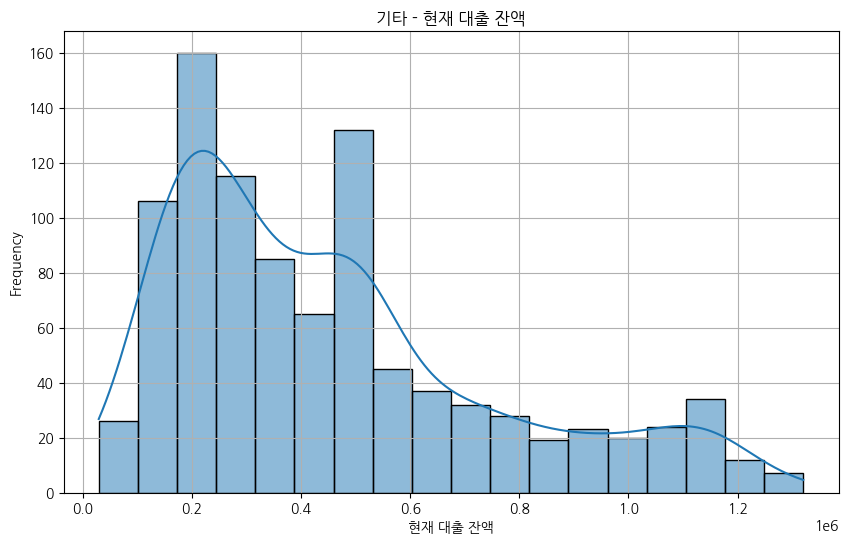

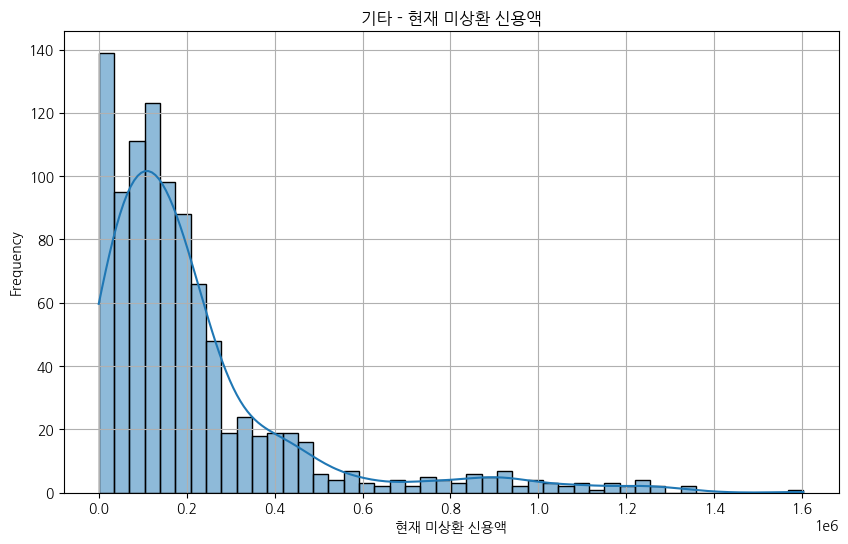

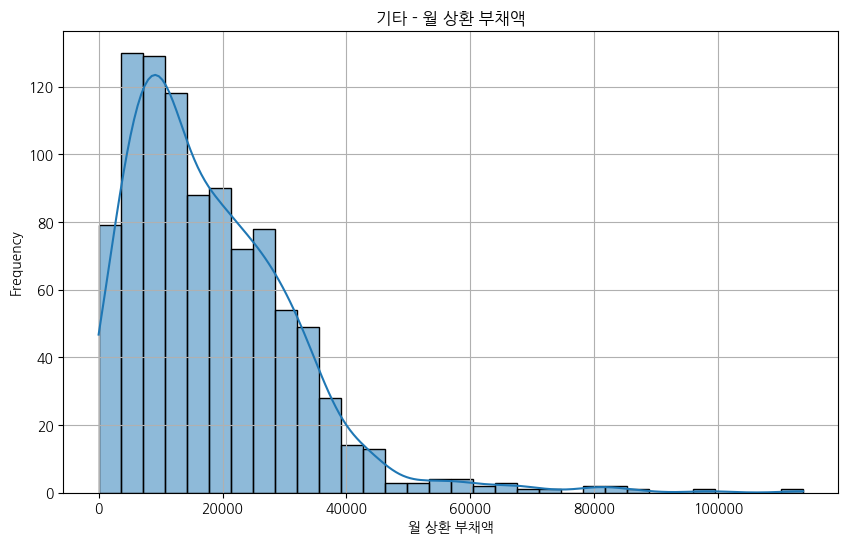

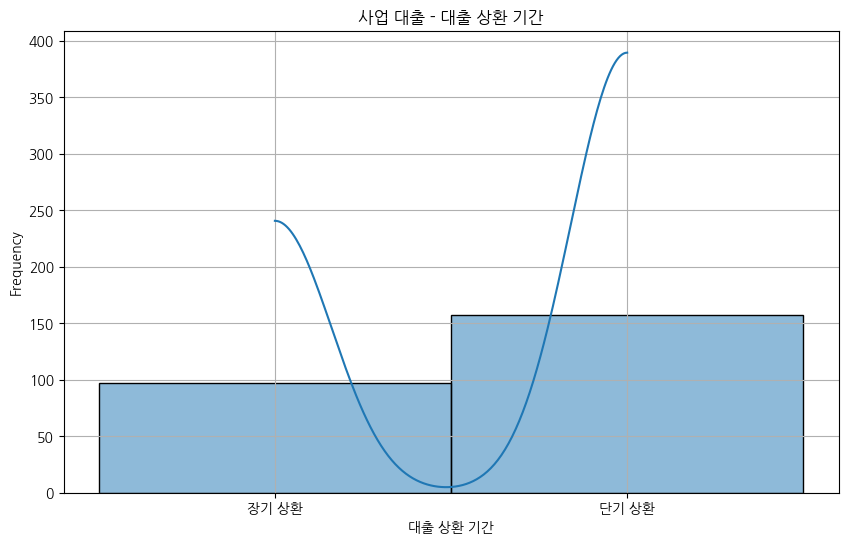

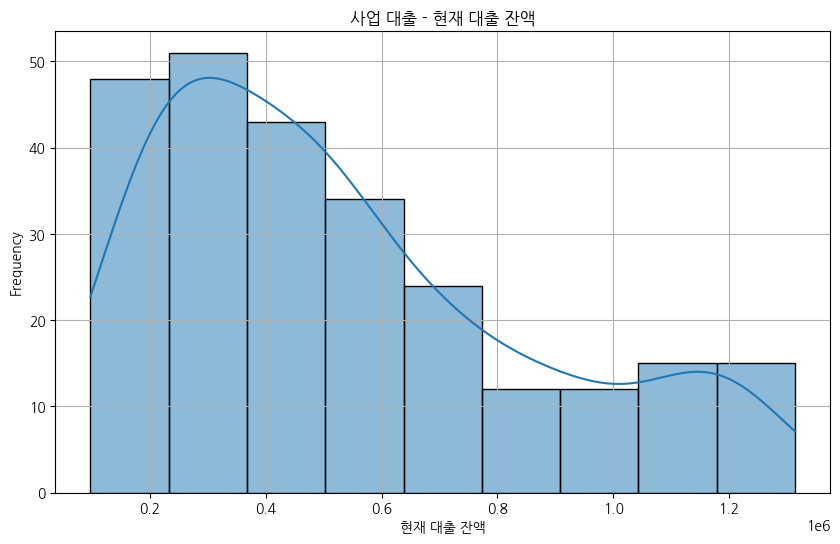

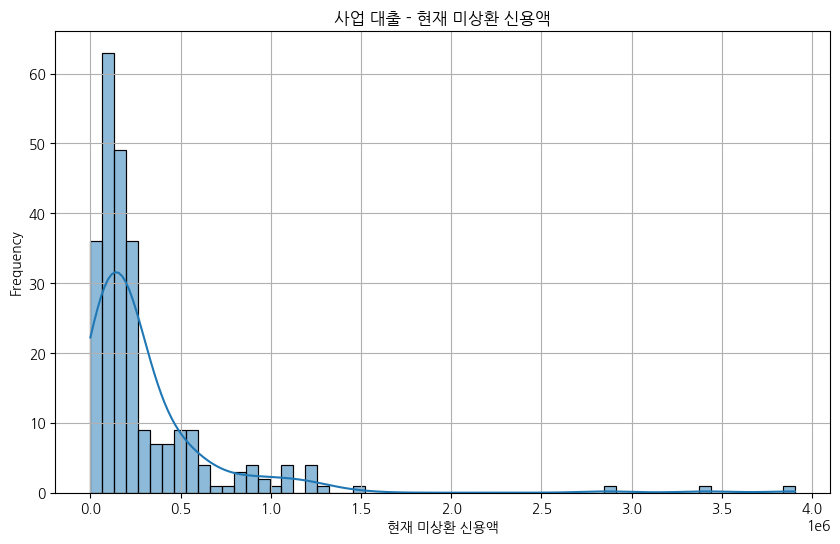

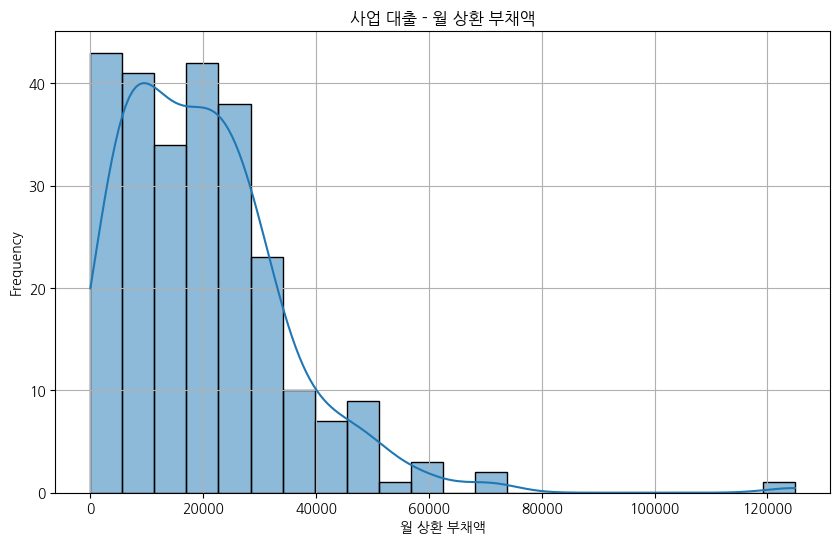

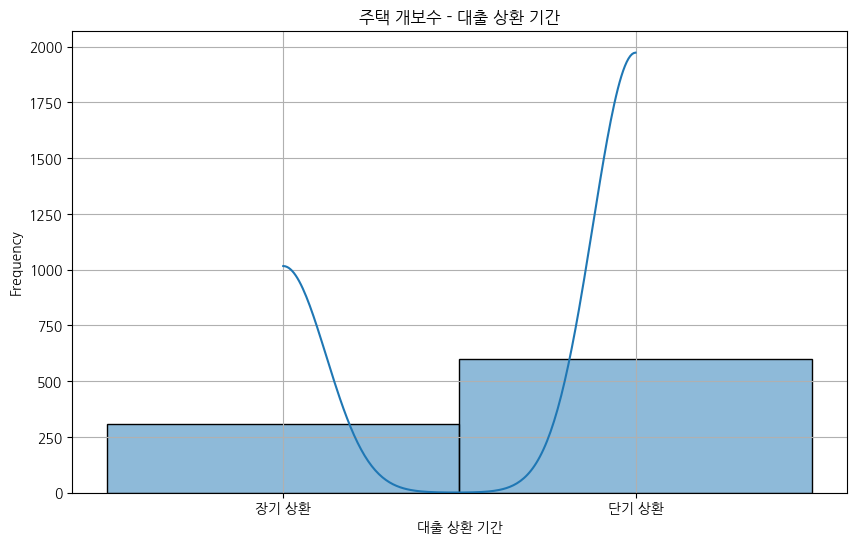

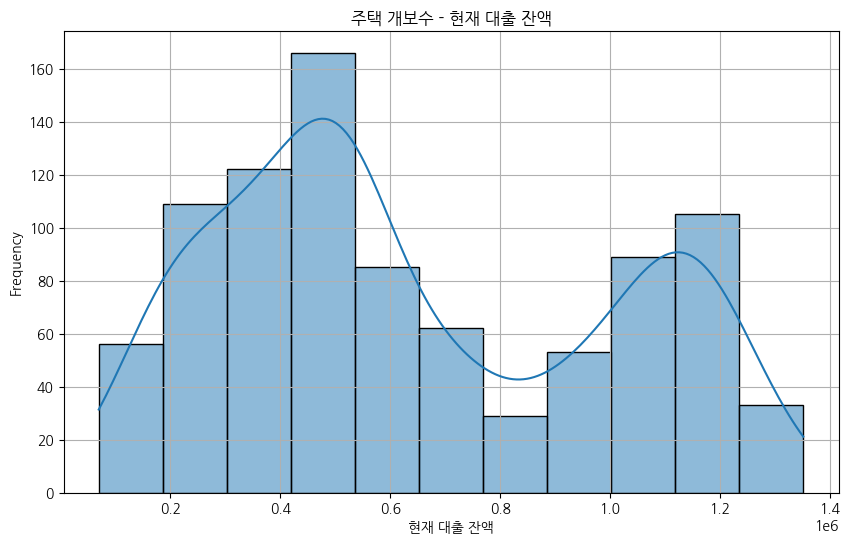

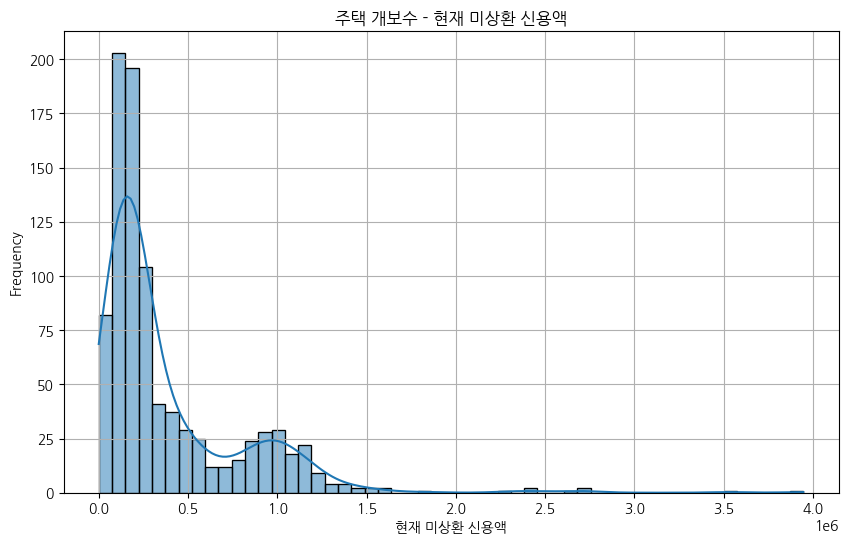

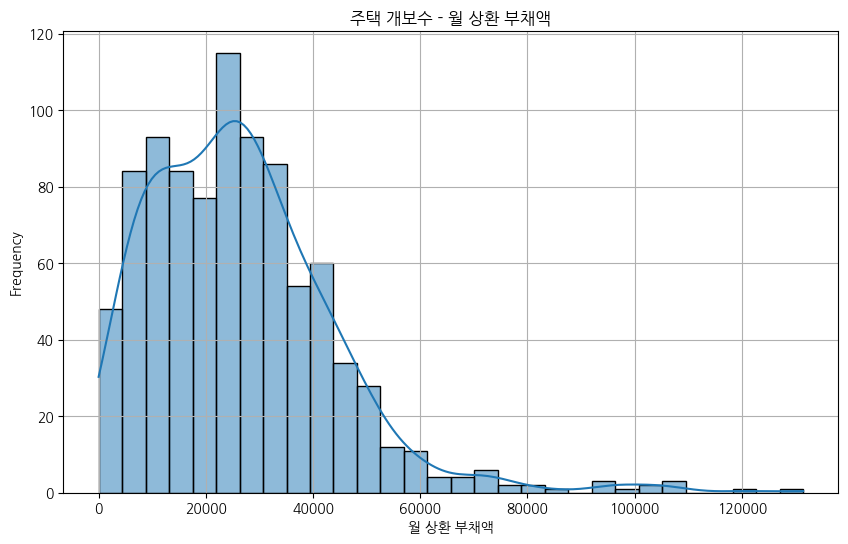

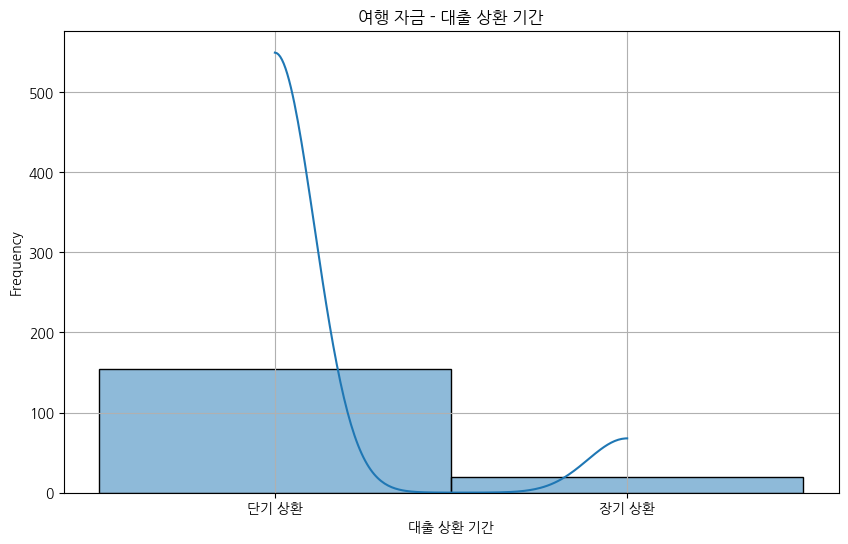

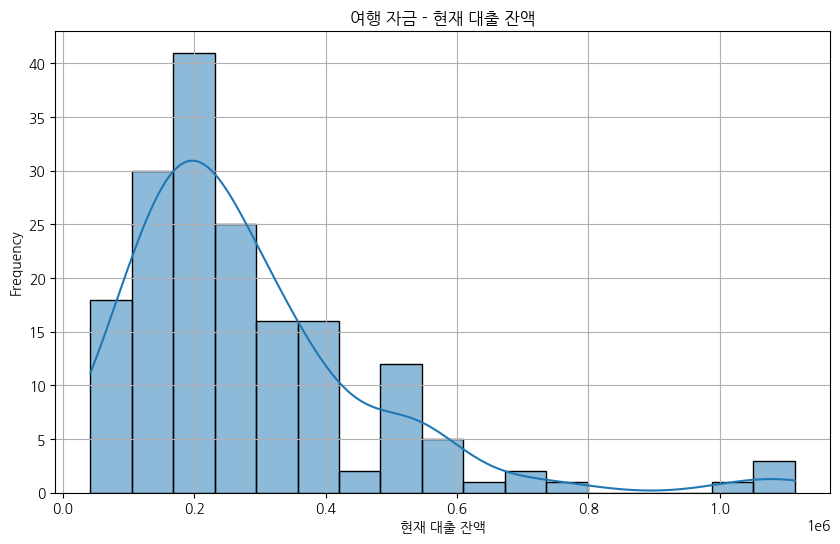

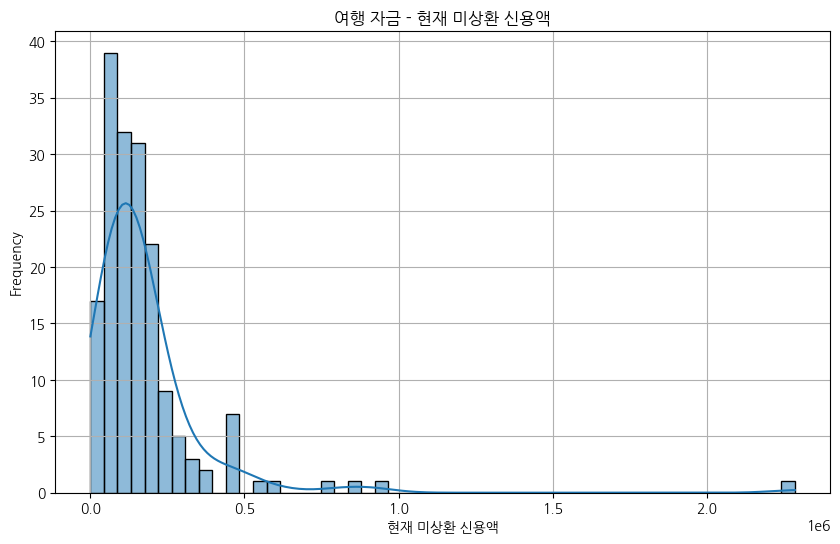

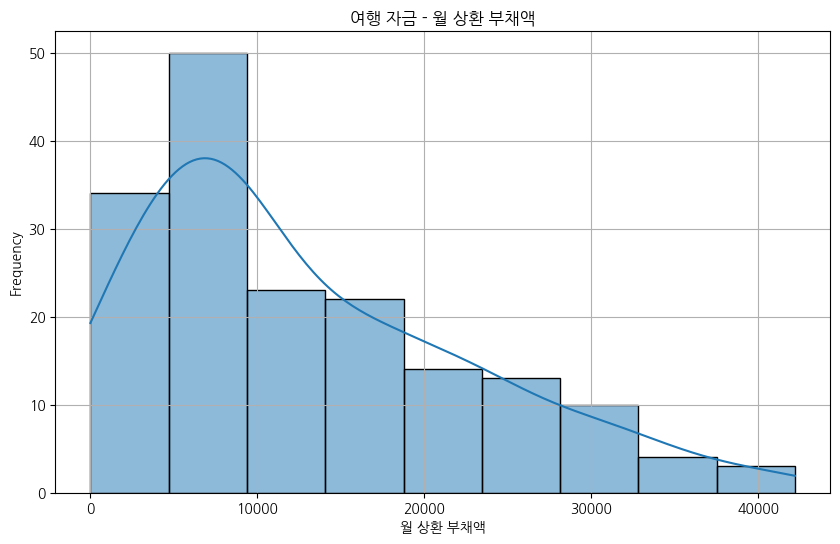

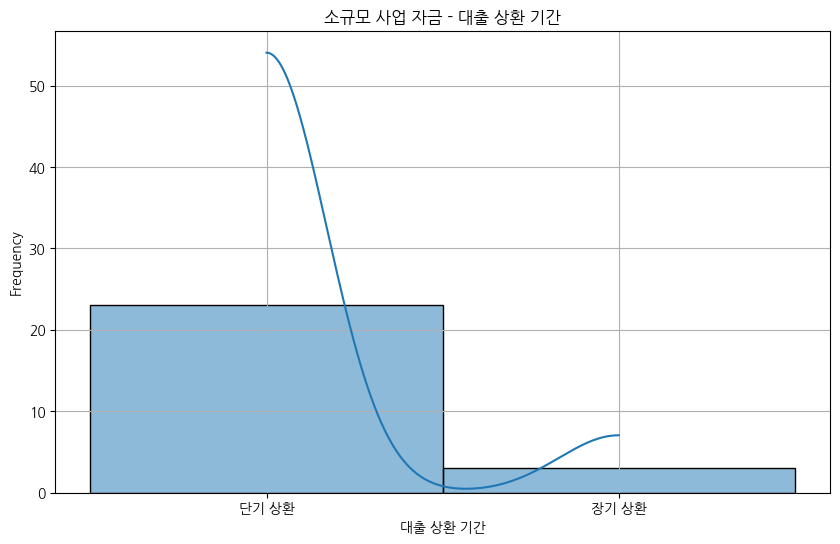

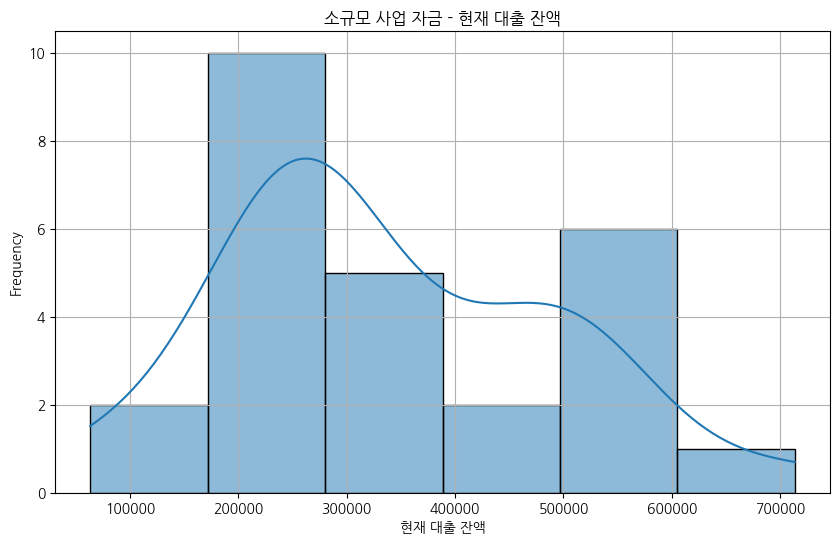

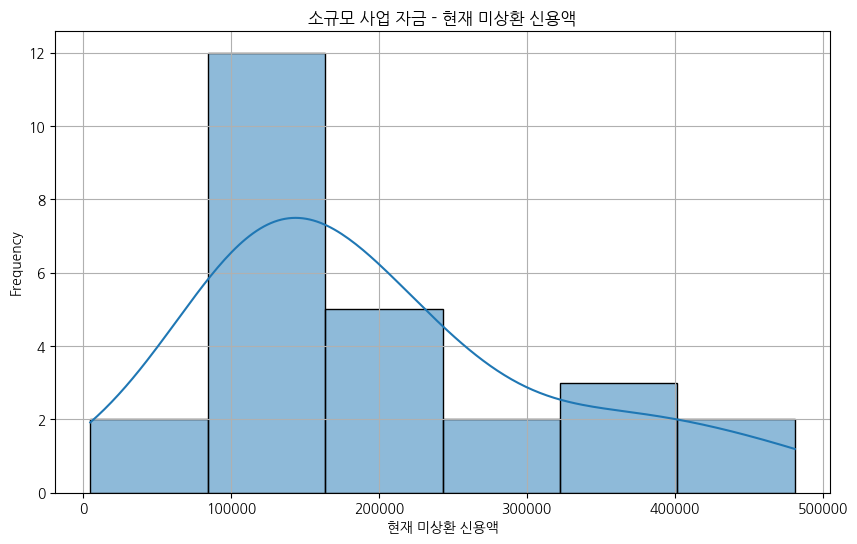

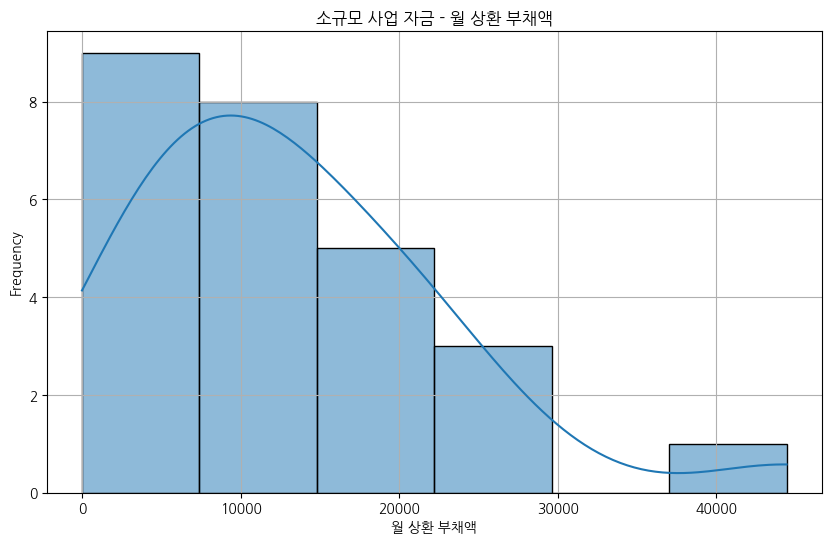

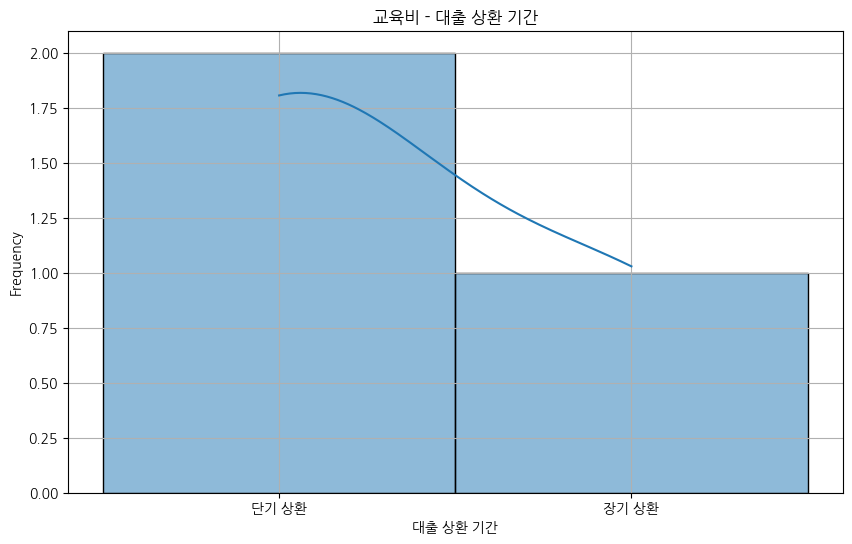

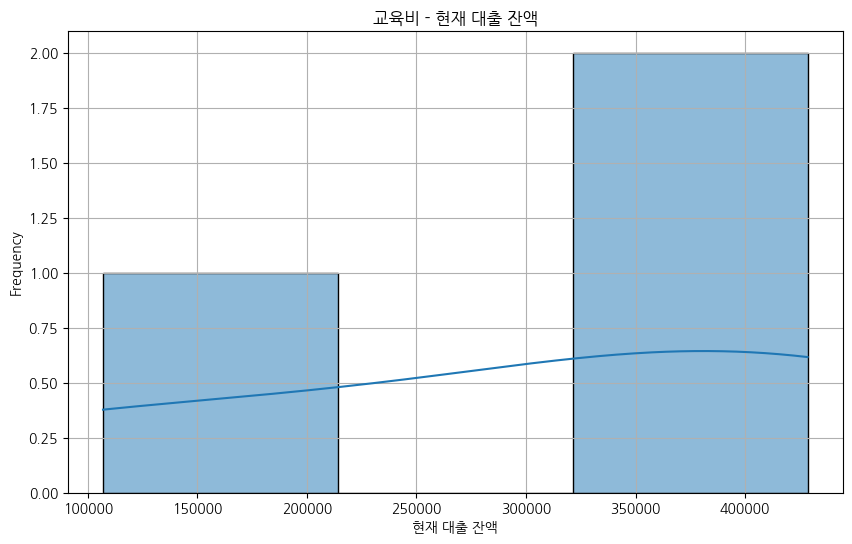

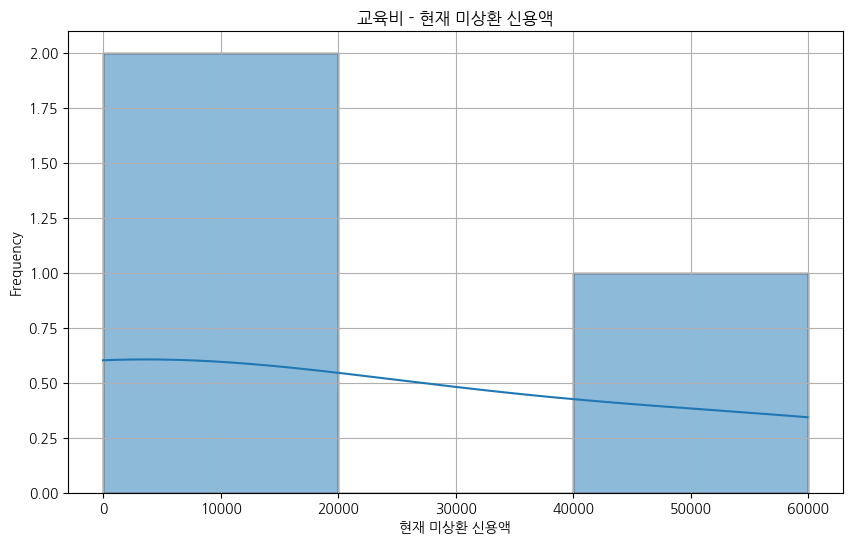

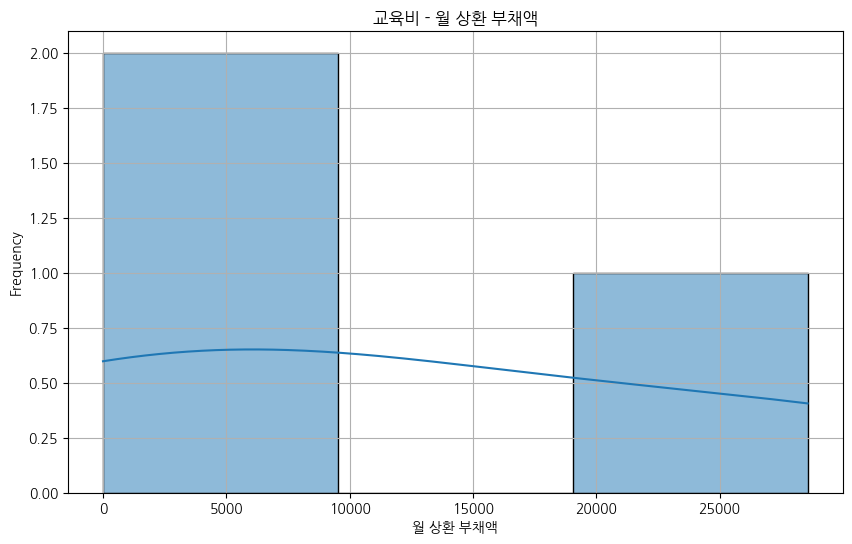

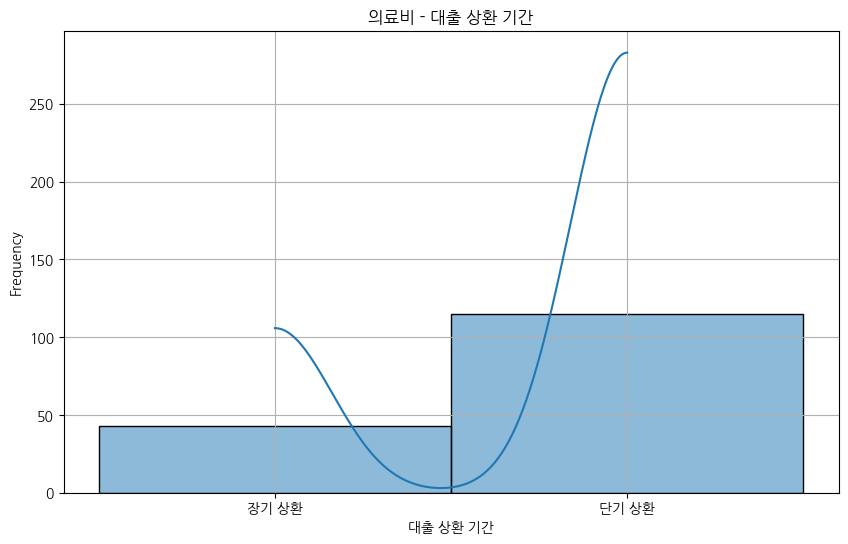

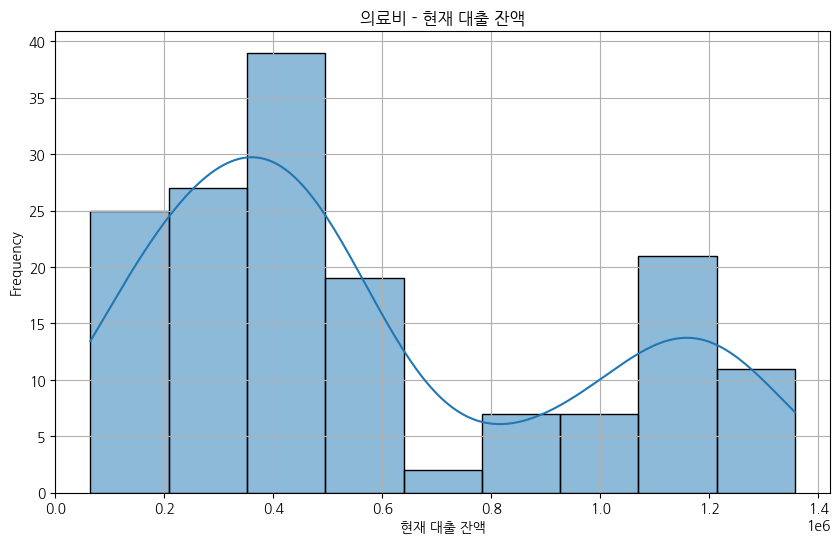

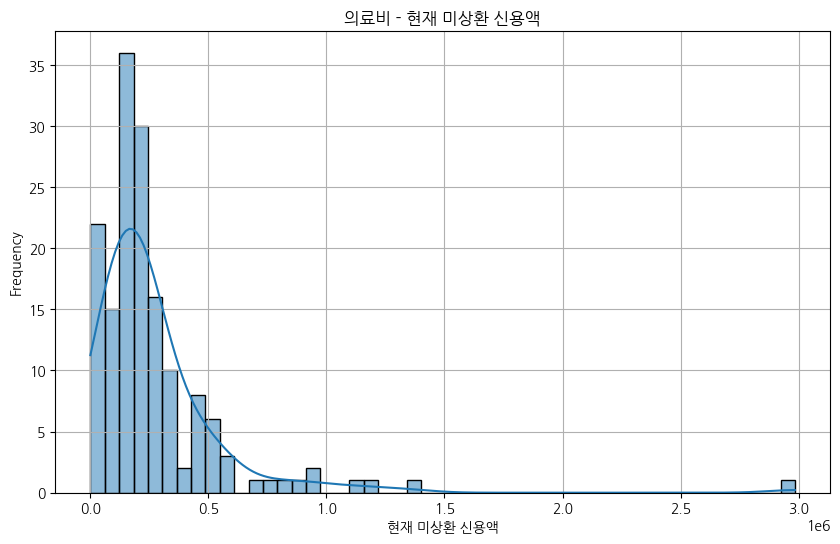

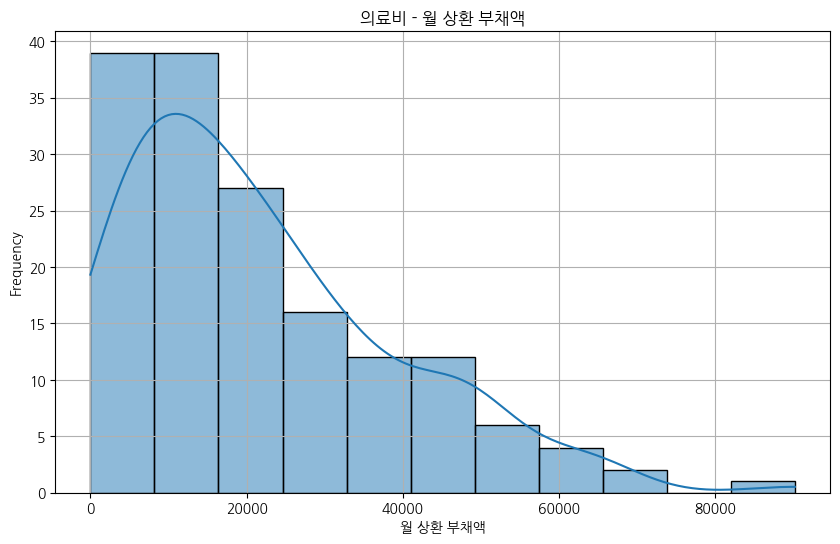

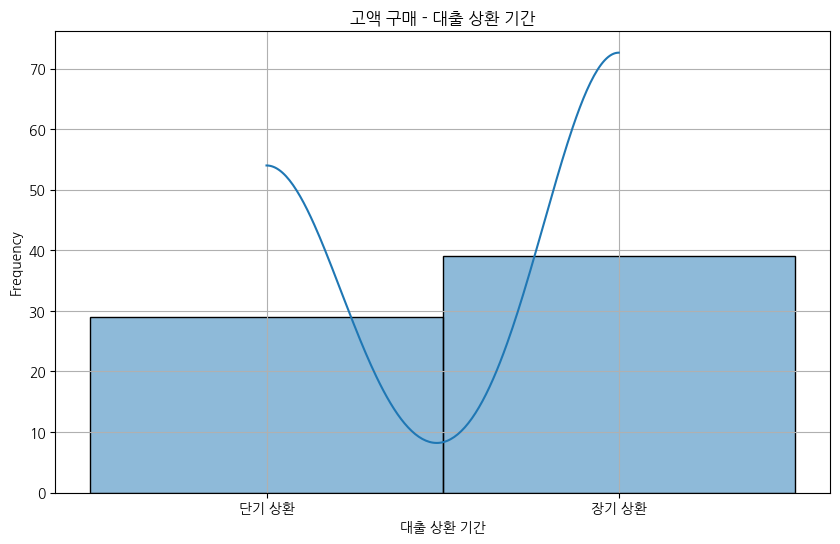

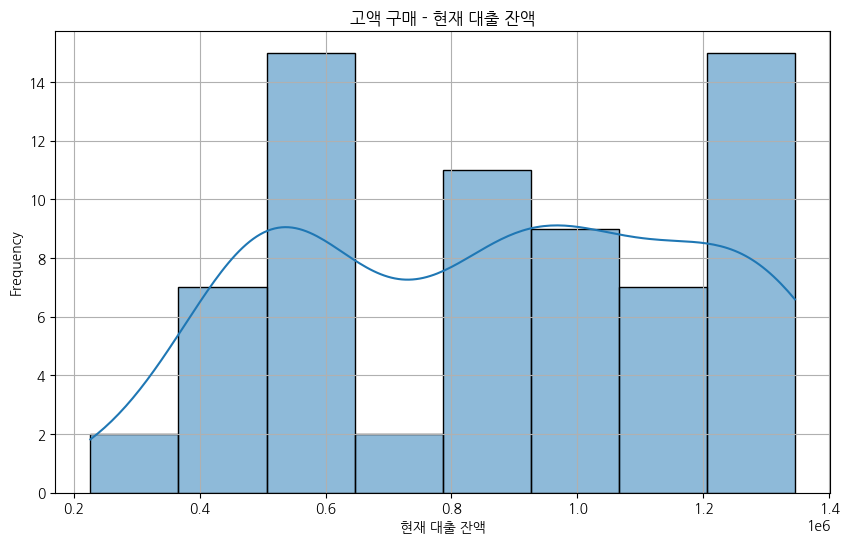

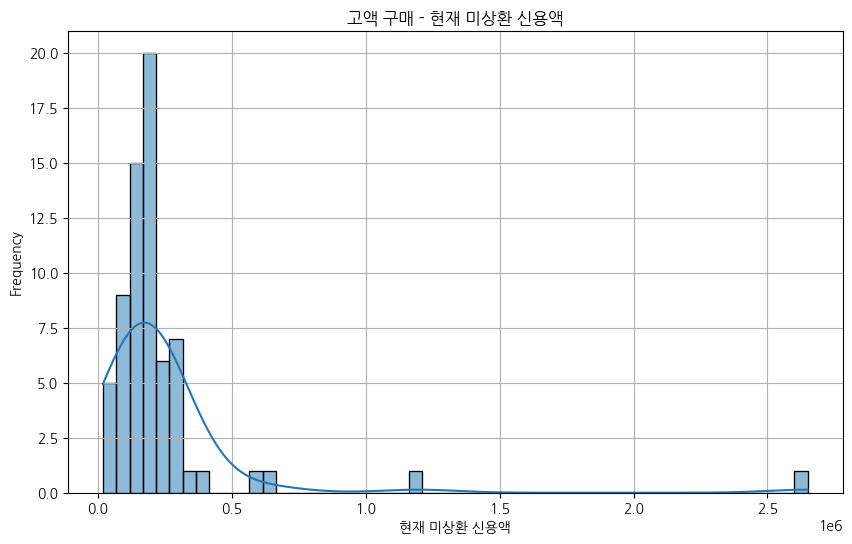

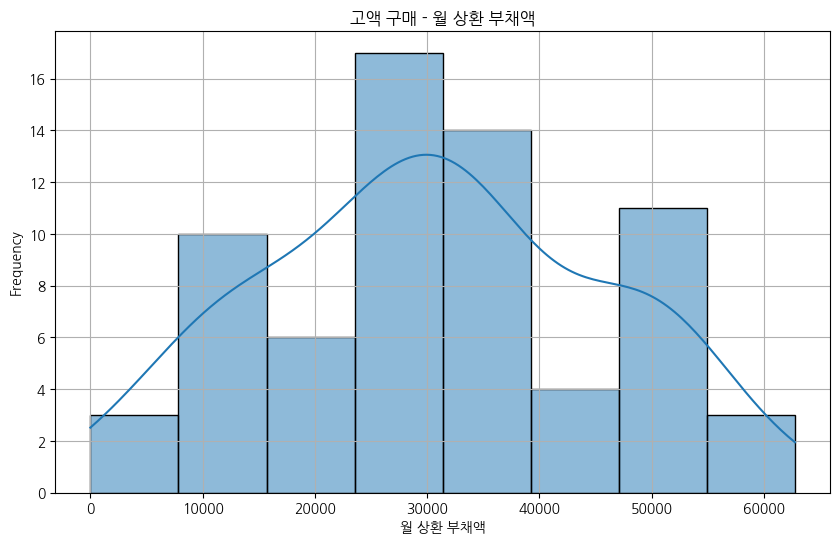

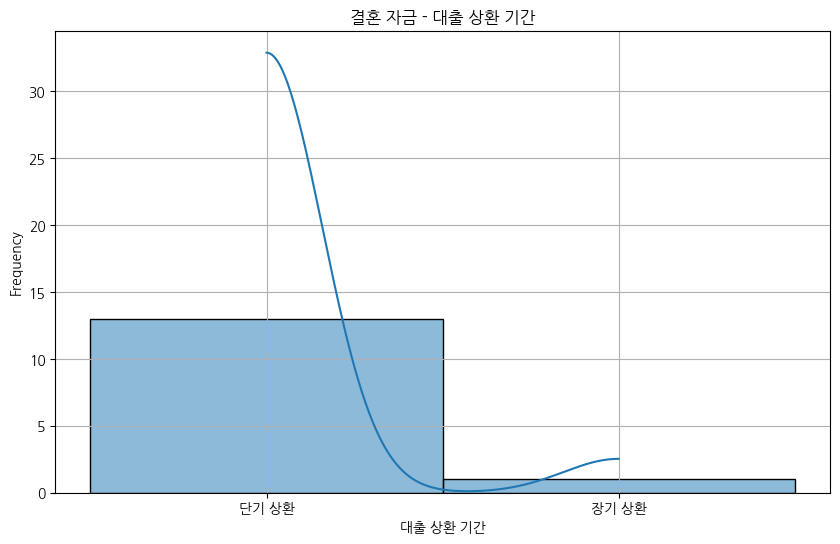

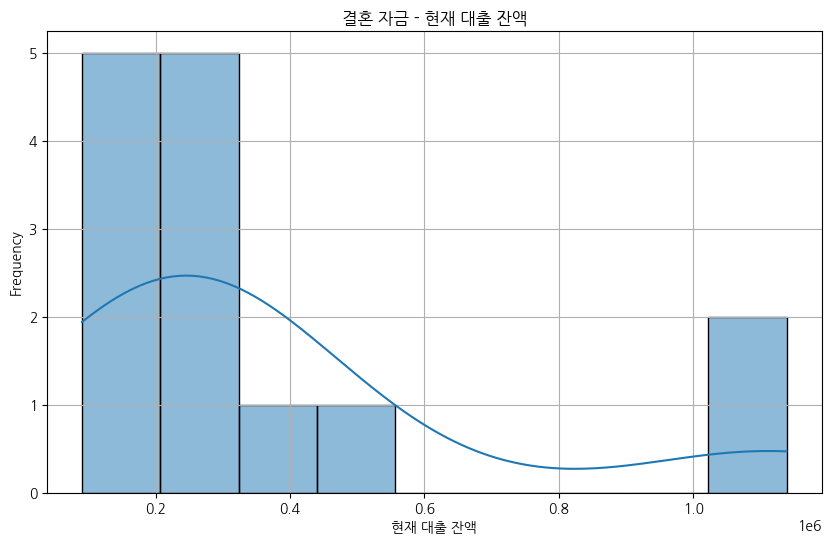

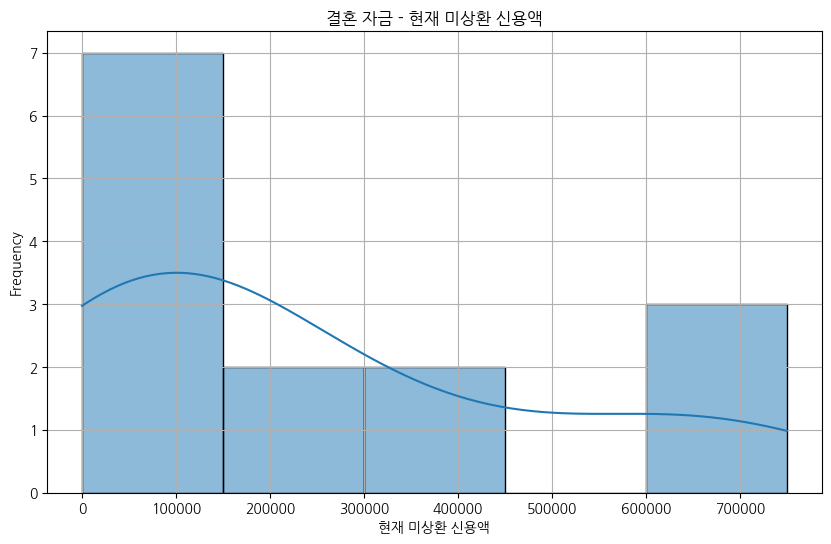

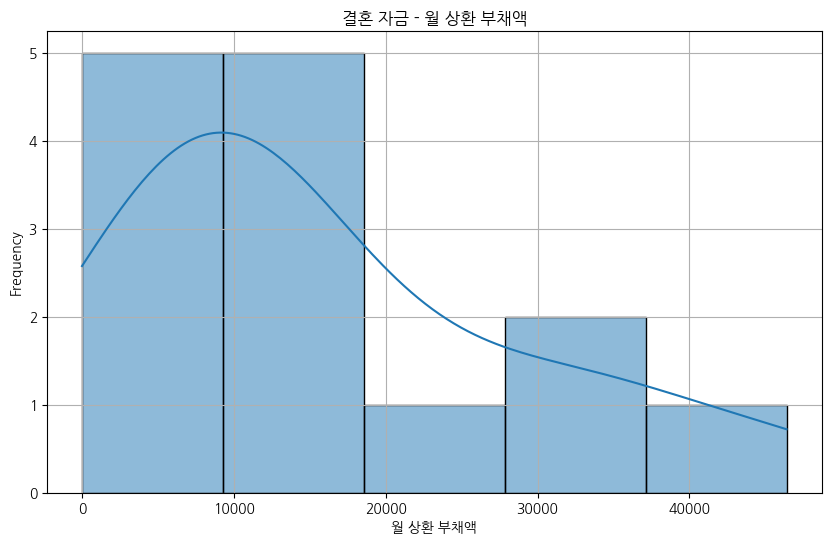

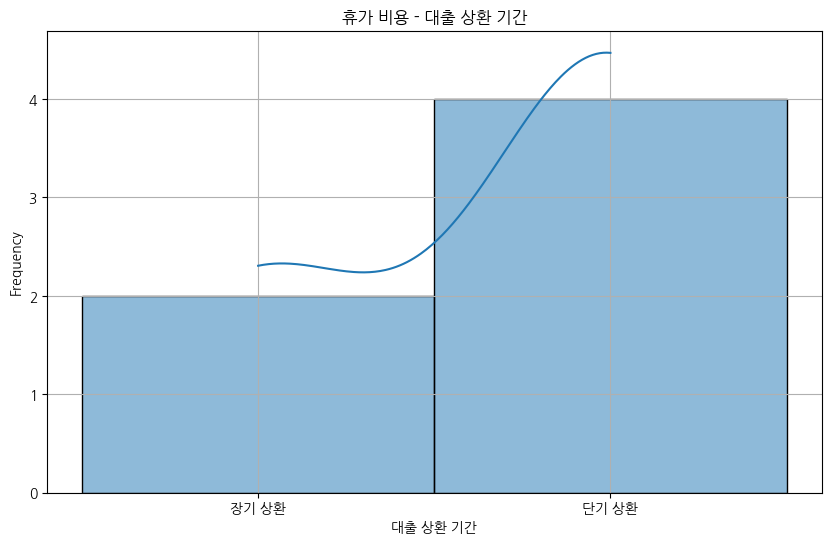

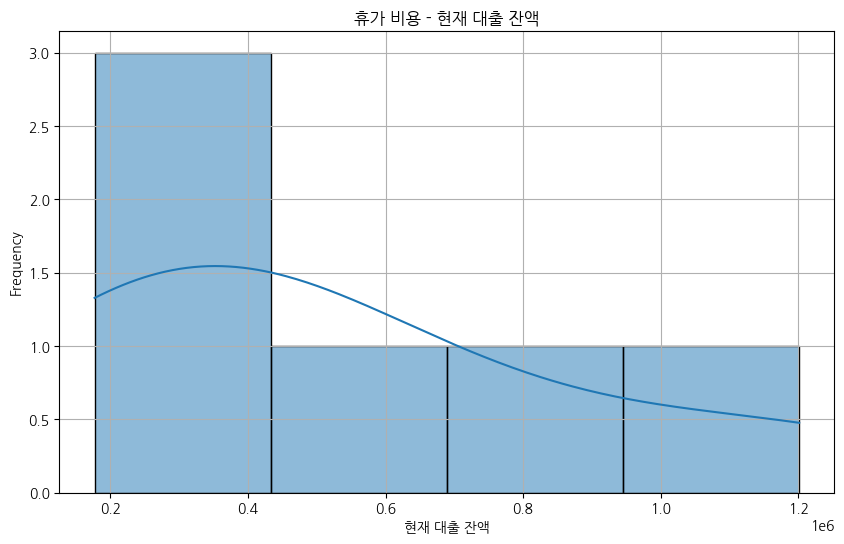

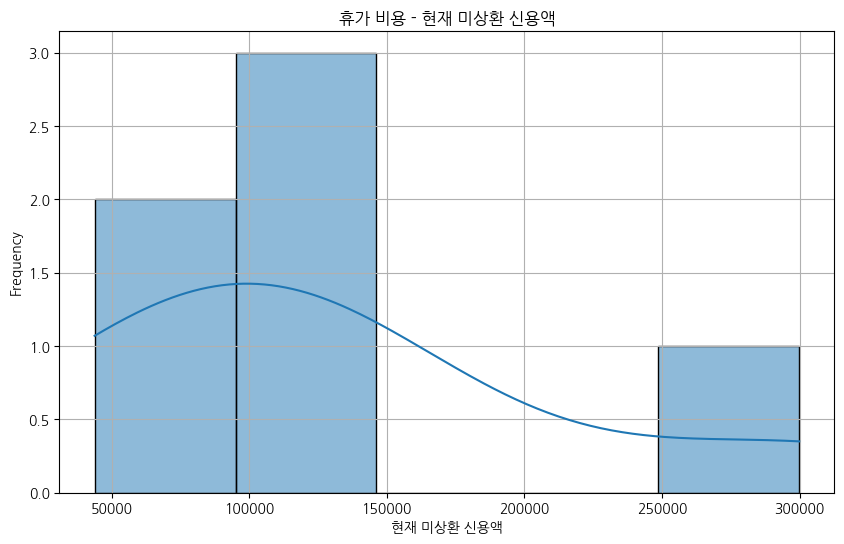

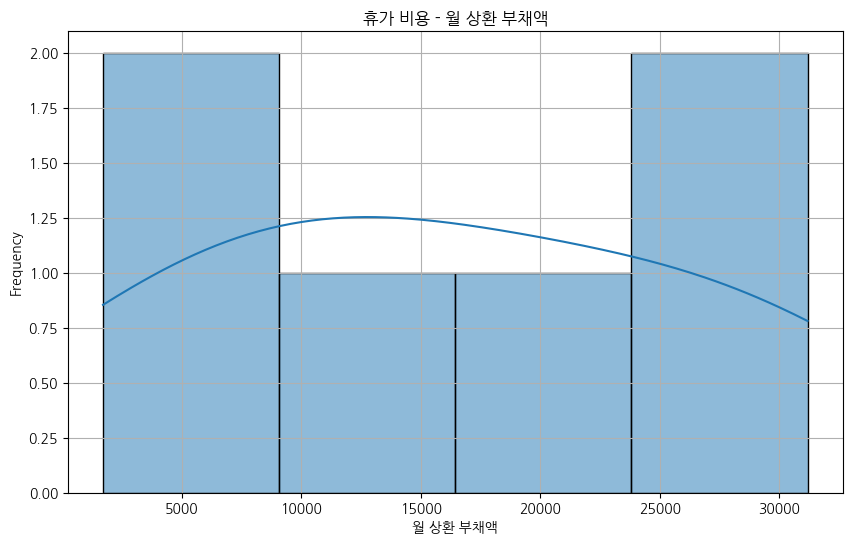

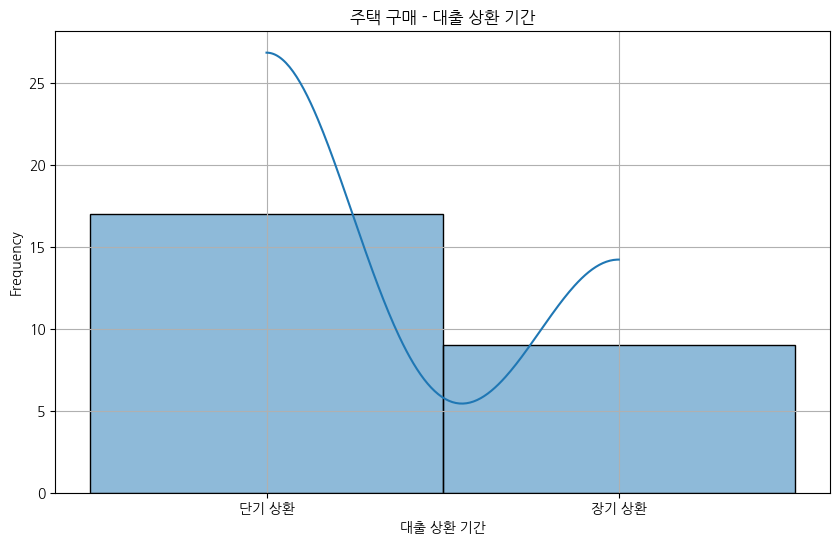

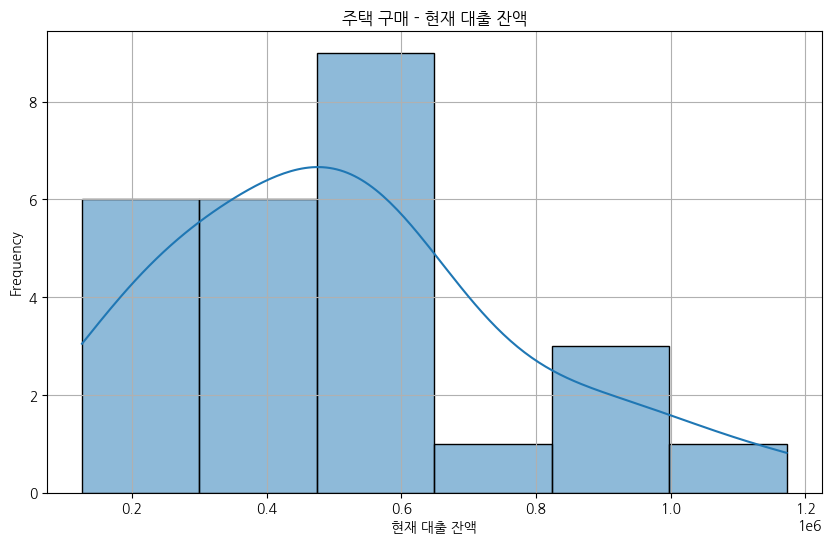

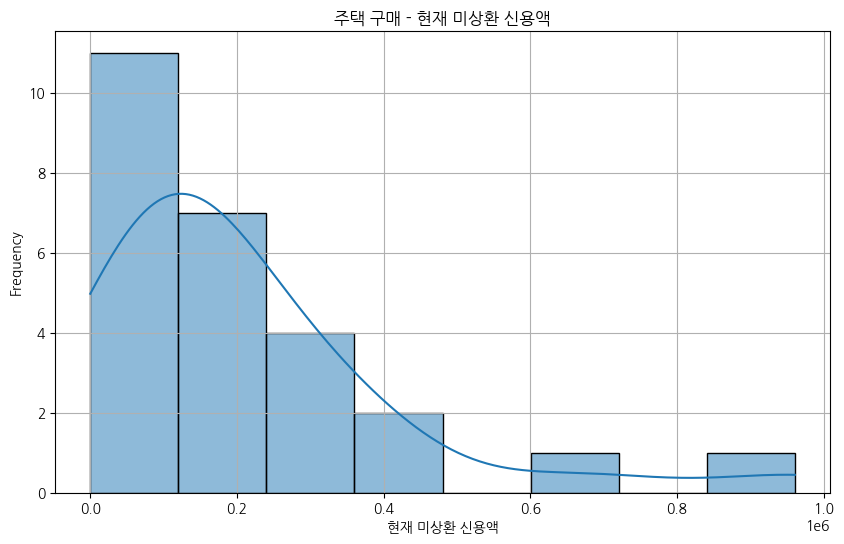

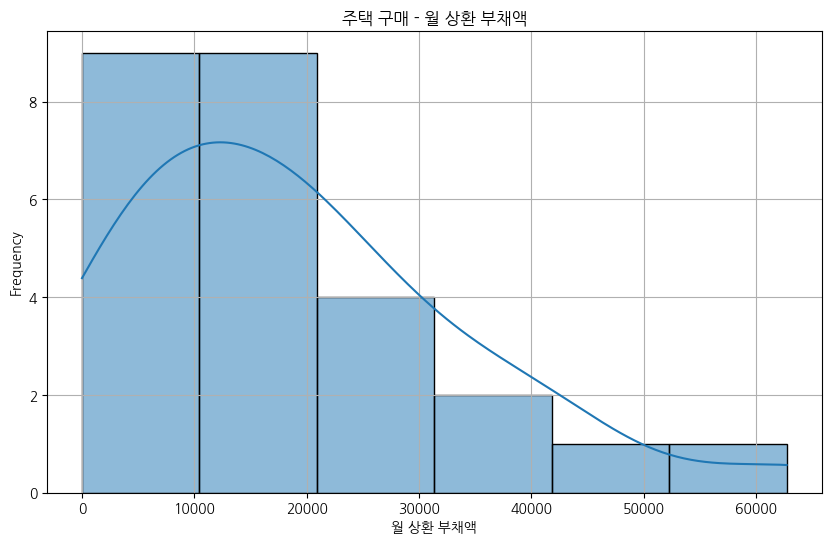

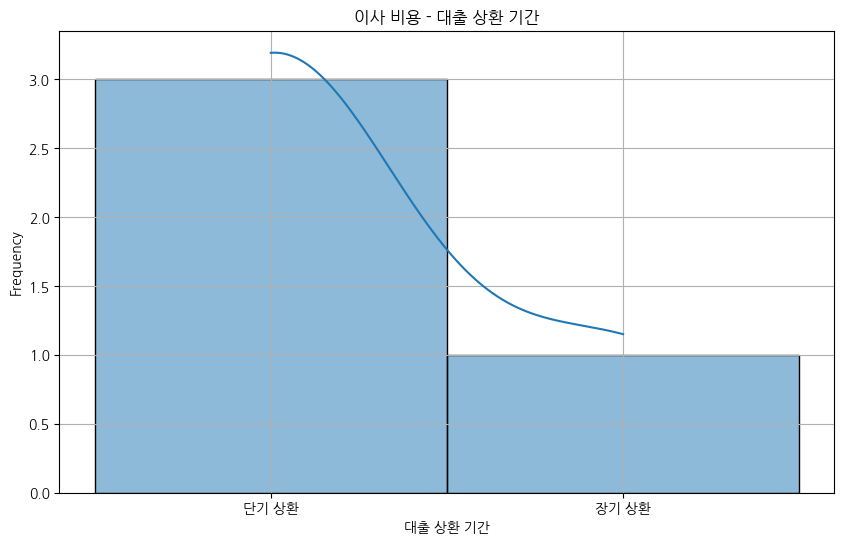

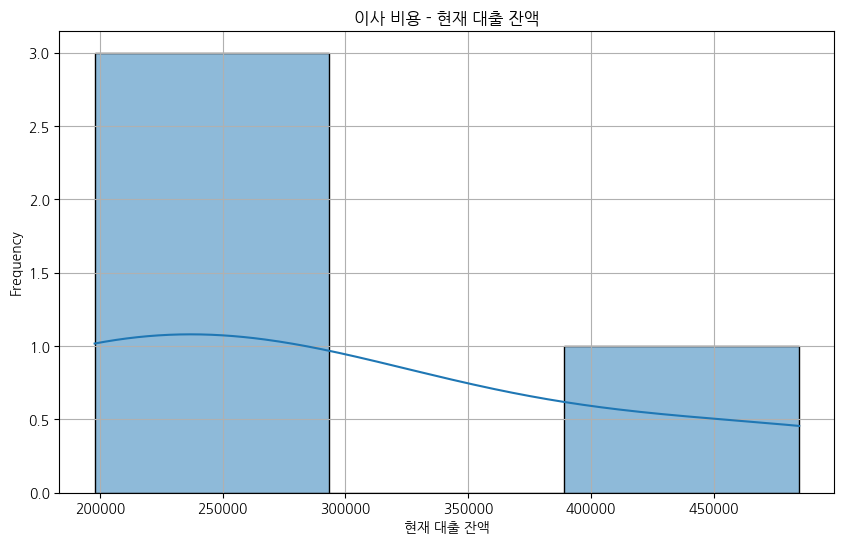

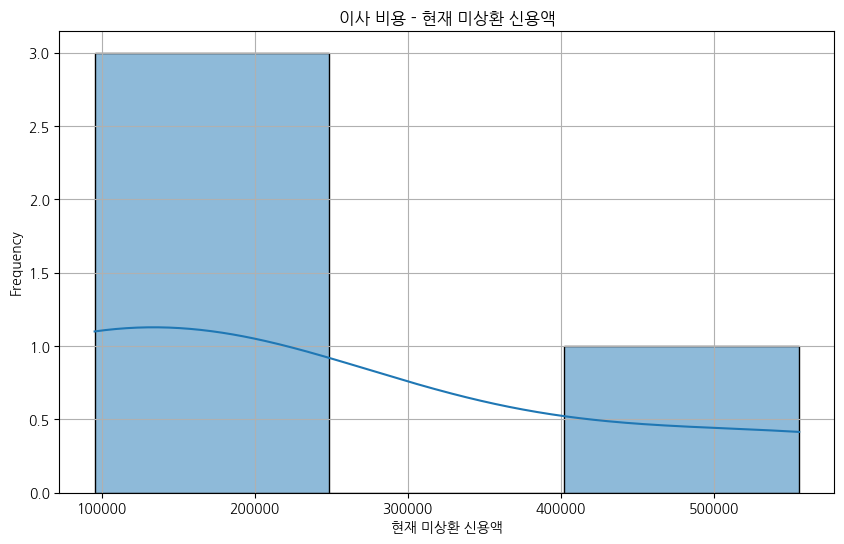

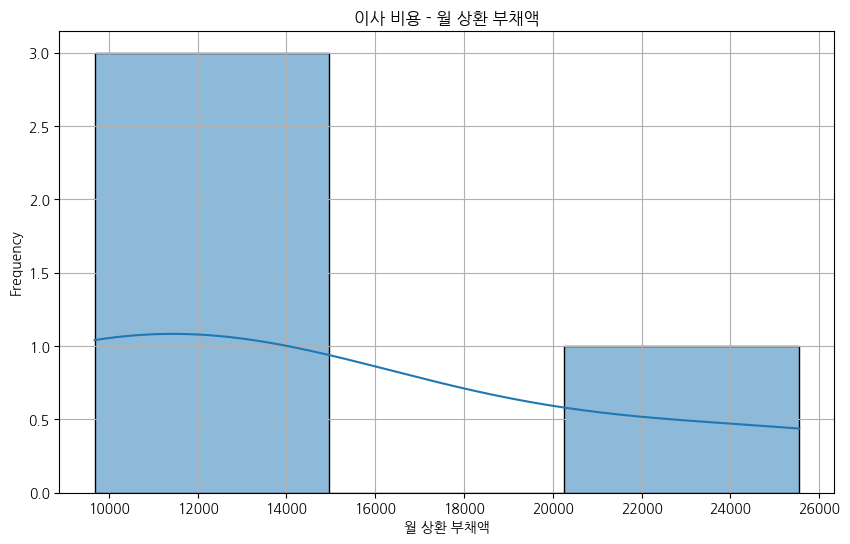

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 대출 목적 리스트
loan_purposes = ['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금', '교육비', '의료비', '고액 구매', '결혼 자금', '휴가 비용', '주택 구매', '이사 비용']

# 히스토그램을 그릴 컬럼 리스트
columns_to_plot = ['대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']

# 각 대출 목적별로 히스토그램 그리기
for purpose in loan_purposes:
    df_filtered = train_df[train_df['대출 목적'] == purpose]
    for column in columns_to_plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_filtered[column], kde=True)
        plt.title(f"{purpose} - {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
